
<h1><center>Linear regression on algerian forest fire data </center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Loading the algerian dataset

In [2]:
df = pd.read_csv('Algerian_forest_fire.csv')
df

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,29
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,29
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,25
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,30
240,27,9,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,28
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,27
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3    RH          244 non-null    int64  
 4    Ws          244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    object 
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    object 
 12  Temperature  244 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 24.9+ KB


In [4]:
# Converting object type features to float type
df['DC']=pd.to_numeric(df['DC'], errors='coerce')
df['FWI']=pd.to_numeric(df['FWI'], errors='coerce')

In [5]:
df.dtypes

day              int64
month            int64
year             int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Temperature      int64
dtype: object

### Attribute Information:

1. **Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. **RH :** Relative Humidity in %: 21 to 90
3. **Ws :**Wind speed in km/h: 6 to 29
4. **Rain :** total day in mm: 0 to 16.8 FWI Components
5. **Fine Fuel Moisture Code (FFMC) :** index from the FWI system: 28.6 to 92.5
6. **Duff Moisture Code (DMC) :** index from the FWI system: 1.1 to 65.9
7. **Drought Code (DC) :** index from the FWI system: 7 to 220.4
8. **Initial Spread Index (ISI) :** index from the FWI system: 0 to 18.5
9. **Buildup Index (BUI) :** index from the FWI system: 1.1 to 68
10. **Fire Weather Index (FWI) :** Index: 0 to 31.1
11. **Temperature :** temperature noon (temperature max) in Celsius degrees: 22 to 42

### checking for null values

In [6]:
df.isnull().sum()

day            0
month          0
year           0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Temperature    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

day            0
month          0
year           0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Temperature    0
dtype: int64

In [9]:
# Description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [10]:
df.corr()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature
day,1.000000,-0.000369,NaN,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.097227
month,-0.000369,1.000000,NaN,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.056781
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,-0.076034,-0.041252,NaN,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.651400
Ws,0.047812,-0.039880,NaN,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.284510
Rain,-0.112523,0.034822,NaN,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.326492
FFMC,0.224956,0.017030,NaN,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.676568
DMC,0.491514,0.067943,NaN,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.485687
DC,0.527952,0.126511,NaN,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.376284
ISI,0.180543,0.065608,NaN,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.603871


In [11]:
# Above correlation table, we can identify that the correlation between BUI and DMC is 0.98 i.e 98% 
# if we want to drop any one feature we can drop. but here i am not droping 

Text(0, 0.5, 'Duff Moisture Code (DMC)')

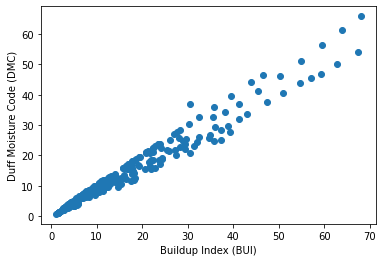

In [12]:
plt.scatter(df['BUI'],df['DMC'])
plt.xlabel("Buildup Index (BUI)")
plt.ylabel('Duff Moisture Code (DMC)')

# Separating independent and dependent features
### As we are trying to predict the temperature here . so, Temperature will become our dependent feature and remaning all are considered as independent features

In [13]:
# Taking independent Features
X = df.iloc[:,:-1]
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [14]:
# Taking the dependent feature i.e Temperature
y = df.iloc[:,-1]
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
227,14,9,2012,81,15,0.0,84.6,12.6,41.5,4.3,14.3,5.7
65,5,8,2012,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
169,18,7,2012,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1
207,25,8,2012,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
144,23,6,2012,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,15,6,2012,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,1,9,2012,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
180,29,7,2012,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9


In [17]:
y_train

227    28
65     34
169    33
207    34
144    33
       ..
106    24
14     28
92     25
180    34
102    30
Name: Temperature, Length: 162, dtype: int64

In [18]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
24,25,6,2012,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4
6,7,6,2012,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
152,1,7,2012,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5
233,20,9,2012,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
5,6,6,2012,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
56,27,7,2012,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3
124,3,6,2012,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1


In [19]:
y_test

24     31
6      33
152    28
233    34
239    30
       ..
242    24
5      31
56     36
124    29
147    36
Name: Temperature, Length: 81, dtype: int64

In [20]:
X_train.shape

(162, 12)

In [21]:
y_train.shape

(162,)

In [22]:
X_test.shape

(81, 12)

In [23]:
y_test.shape

(81,)

# Standardization 

In [24]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
scaler

StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

# Model Training

In [28]:
## Model Training 
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [30]:
## print the coefficients and the intercept
print(regression.coef_)

[-4.87892562e-01 -1.69179719e-01 -7.77156117e-16 -1.14316544e+00
 -7.06359723e-01  3.72092505e-01  1.52711045e+00  3.24913777e+00
  2.50834889e+00  2.77765500e-01 -4.66186953e+00 -3.51345548e-01]


In [31]:
print(regression.intercept_)

32.098765432098766


In [32]:
reg_pred = regression.predict(X_test)
reg_pred

array([32.81327423, 34.9263965 , 30.73114993, 33.3005433 , 32.26563482,
       32.23836465, 31.47593624, 35.02846936, 31.61859089, 31.34835374,
       28.52991915, 39.35465385, 34.58541228, 34.45313633, 34.04877059,
       32.95614866, 33.21461168, 25.65996103, 32.7212673 , 34.93519006,
       30.85274429, 28.37529759, 33.59601163, 29.03889428, 36.43293779,
       34.21293536, 33.43570415, 33.58250503, 26.69158696, 33.49239728,
       29.80311421, 32.38722622, 32.2018779 , 33.00137247, 32.17656661,
       32.87943714, 31.23358621, 34.68358703, 26.5065588 , 21.51999708,
       34.48230579, 33.04995827, 34.43511591, 24.9589704 , 36.4050724 ,
       32.7333408 , 30.8297352 , 30.64583177, 33.25125687, 28.71592584,
       37.06520973, 35.44423281, 33.6157875 , 34.54706109, 33.34179962,
       32.31905467, 32.39693049, 32.74546375, 31.98208875, 36.50126392,
       33.36161493, 30.22490426, 29.10571794, 36.63325387, 31.73481349,
       32.00171685, 33.25297213, 34.52572511, 35.40549008, 24.63

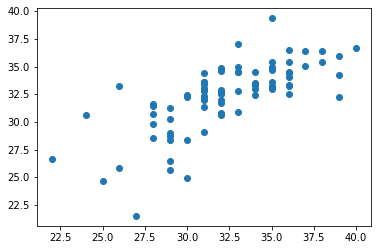

In [42]:
## asssunmptions of linear regressions
plt.scatter(y_test,reg_pred)

<AxesSubplot:xlabel='Temperature'>

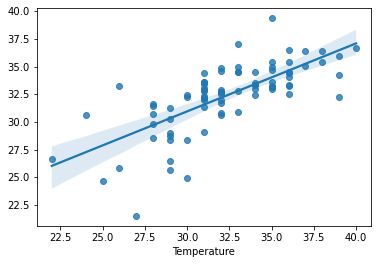

In [46]:
sns.regplot(x=y_test,y=reg_pred)


In [34]:
residuals = y_test-reg_pred
residuals

24    -1.813274
6     -1.926396
152   -2.731150
233    0.699457
239   -2.265635
         ...   
242   -6.629294
5     -1.885712
56     0.624450
124    0.606371
147    3.517914
Name: Temperature, Length: 81, dtype: float64

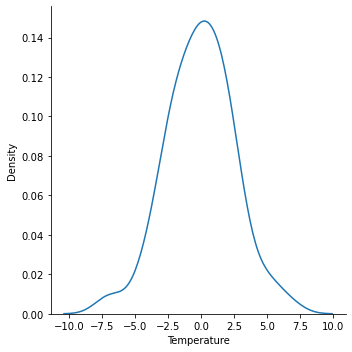

In [35]:
sns.displot(residuals,kind='kde')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Temperature'>

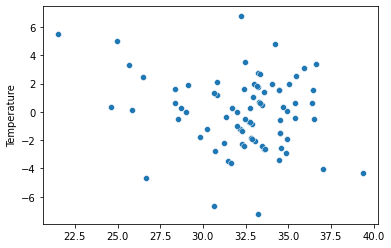

In [36]:
# scatter plot with prediction and residuals
# Uniform distribution
sns.scatterplot(reg_pred,residuals)

In [37]:
## performance metrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.478947265661607
1.993509404151708
2.5453776273200814


## R square and adjusted R square

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.49517394648703383


In [40]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4060869958670986